In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [146]:
full_df = pd.read_csv('Data/Final_NBA_PLayers_updated.csv', index_col = 0)
# df = pd.read_csv('Data/Final_NBA_Seasons1-3.csv', index_col = 0)
df_final = pd.read_csv('Data/Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

In [147]:
full_df.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%', 'season_count', 'ppg', 'apg', 'rpg', 'spg', 'bpg', 'tpg',
       'ftpg', 'name_split', 'name', 'unique_id', 'year_split', 'award_year',
       'season_year', 'concat', 'unique_id_match', 'all_nba_first',
       'all_nba_second', 'all_nba_third', 'all_rookie_1', 'all_rookie_2',
       'all_d_1', 'all_d_2', 'roy', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS',
       'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

<AxesSubplot:xlabel='season_count', ylabel='ppg'>

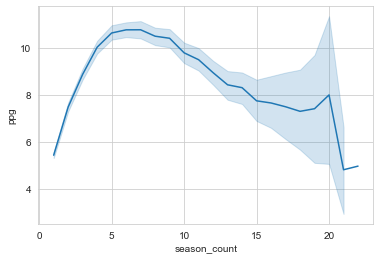

In [148]:
sns.lineplot(x = full_df['season_count'], y = full_df['ppg'])

<AxesSubplot:xlabel='season_count', ylabel='WS'>

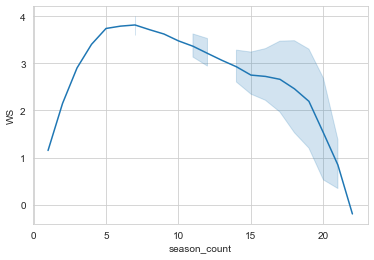

In [149]:
sns.lineplot(x = full_df['season_count'], y = full_df['WS'])

<AxesSubplot:xlabel='season_count', ylabel='VORP'>

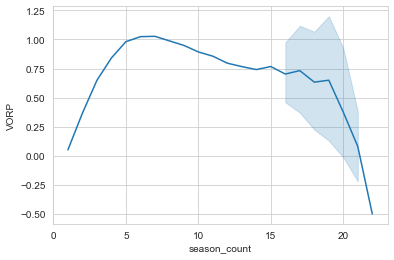

In [150]:
sns.lineplot(x = full_df['season_count'], y = full_df['VORP'])

In [152]:
df_final.head()

G     GS      MP   FG   FGA   2P   2PA     3P  \
Player                                                                    
A.C. Green\greenac01    243  137.0  6418.0  847  1615  846  1602    1.0   
A.J. Price\priceaj01    150    3.0  2228.0  318   848  191   437  127.0   
Aaron Brooks\brookaa01  213  117.0  5525.0  984  2339  626  1396  358.0   
Aaron Gordon\gordoaa01  205  117.0  4958.0  760  1652  628  1195  132.0   
Aaron Gray\grayaa01     149   19.0  1639.0  226   453  226   451    0.0   

                          3PA   FT  ...  DWS_1-2  DWS_2-3  PER_1-2  PER_2-3  \
Player                              ...                                       
A.C. Green\greenac01     13.0  615  ...      1.3      0.1      3.9     -1.2   
A.J. Price\priceaj01    411.0  142  ...     -0.1     -0.2     -3.3      0.8   
Aaron Brooks\brookaa01  943.0  436  ...      1.4     -0.6     -0.2      3.1   
Aaron Gordon\gordoaa01  457.0  329  ...      1.5     -0.5      5.6     -2.5   
Aaron Gray\grayaa01       2.0  110  ...      0.0     -0.4     -2.4      5.1   

                        USG_1-2  USG_2-3  VORP_1-2  VORP_2-3  target  \
Player                                                                 
A.C. Green\greenac01        0.0      0.0       1.5      -0.2       0   
A.J. Price\priceaj01        0.0     -5.0      -0.5       0.3       0   
Aaron Brooks\brookaa01      1.1      2.8       0.3       1.3       0   
Aaron Gordon\gordoaa01      1.8      2.8       1.6      -0.8       0   
Aaron Gray\grayaa01        -7.5      1.9       0.0       0.3       0   

                        Qualified  
Player                             
A.C. Green\greenac01          1.0  
A.J. Price\priceaj01          1.0  
Aaron Brooks\brookaa01        1.0  
Aaron Gordon\gordoaa01        1.0  
Aaron Gray\grayaa01           1.0  

[5 rows x 216 columns]

In [153]:
#YoY categorial variable increases
df_final['VORP_Incr'] = np.where((df_final['VORP_1-2'] > 0) & (df_final['VORP_2-3'] > 0),1,0) 
df_final['PER_Incr'] = np.where((df_final['PER_1-2'] > 0) & (df_final['PER_2-3'] > 0),1,0) 
df_final['USG_Incr'] = np.where((df_final['USG_1-2'] > 0) & (df_final['USG_2-3'] > 0),1,0)
df_final['WS_Incr'] = np.where((df_final['WS_1-2'] > 0) & (df_final['WS_2-3'] > 0),1,0)
df_final['PPG_Incr'] = np.where((df_final['PPG_1-2'] > 0) & (df_final['PPG_2-3'] > 0),1,0)

In [154]:
df_final['target'].value_counts()

0    1183
1      90
Name: target, dtype: int64

In [155]:
len(df_final['target'] == 1)

1273

In [156]:
df_final.head()

G     GS      MP   FG   FGA   2P   2PA     3P  \
Player                                                                    
A.C. Green\greenac01    243  137.0  6418.0  847  1615  846  1602    1.0   
A.J. Price\priceaj01    150    3.0  2228.0  318   848  191   437  127.0   
Aaron Brooks\brookaa01  213  117.0  5525.0  984  2339  626  1396  358.0   
Aaron Gordon\gordoaa01  205  117.0  4958.0  760  1652  628  1195  132.0   
Aaron Gray\grayaa01     149   19.0  1639.0  226   453  226   451    0.0   

                          3PA   FT  ...  USG_2-3  VORP_1-2  VORP_2-3  target  \
Player                              ...                                        
A.C. Green\greenac01     13.0  615  ...      0.0       1.5      -0.2       0   
A.J. Price\priceaj01    411.0  142  ...     -5.0      -0.5       0.3       0   
Aaron Brooks\brookaa01  943.0  436  ...      2.8       0.3       1.3       0   
Aaron Gordon\gordoaa01  457.0  329  ...      2.8       1.6      -0.8       0   
Aaron Gray\grayaa01       2.0  110  ...      1.9       0.0       0.3       0   

                        Qualified  VORP_Incr  PER_Incr  USG_Incr  WS_Incr  \
Player                                                                      
A.C. Green\greenac01          1.0          0         0         0        1   
A.J. Price\priceaj01          1.0          0         0         0        0   
Aaron Brooks\brookaa01        1.0          1         0         1        1   
Aaron Gordon\gordoaa01        1.0          0         0         1        0   
Aaron Gray\grayaa01           1.0          0         0         0        0   

                        PPG_Incr  
Player                            
A.C. Green\greenac01           1  
A.J. Price\priceaj01           0  
Aaron Brooks\brookaa01         1  
Aaron Gordon\gordoaa01         1  
Aaron Gray\grayaa01            0  

[5 rows x 221 columns]

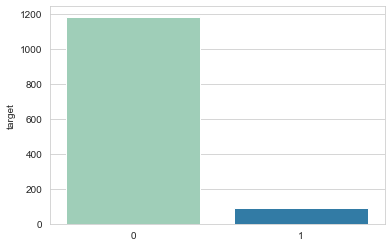

In [162]:

sns.barplot(x = df_final['target'].value_counts().index, y = df_final['target'].value_counts(), palette = 'YlGnBu')
plt.set_title('All NBA Seasons 4-6')
plt.set_ylabel('Count')
plt.set_xticklabels(['Not All NBA', 'All NBA'])
plt.figure.savefig('target_barchart.png')

#### YoY Scatter Plots 

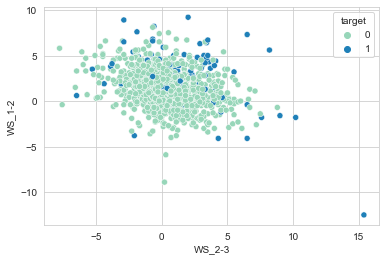

In [56]:
sns.scatterplot(x = df_final['WS_2-3'], y = df_final['WS_1-2'], hue = df_final['target'], palette = 'YlGnBu')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

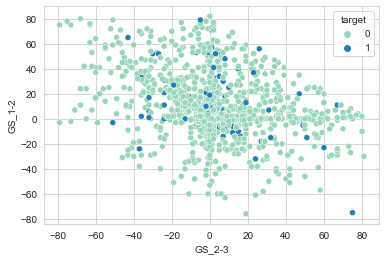

In [58]:
sns.scatterplot(x = df_final['GS_2-3'], y = df_final['GS_1-2'], hue = df_final['target'], palette = 'YlGnBu')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

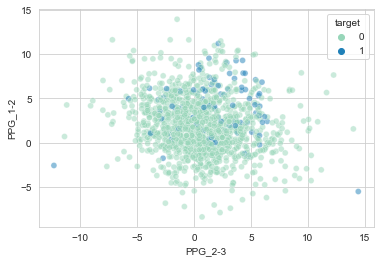

In [60]:
sns.scatterplot(x = df_final['PPG_2-3'], y = df_final['PPG_1-2'], hue = df_final['target'], palette = 'YlGnBu', alpha = .5)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

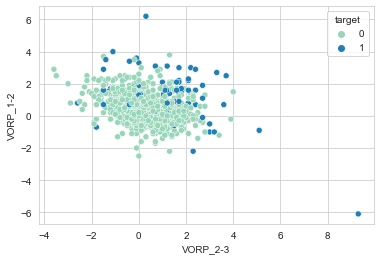

In [62]:
sns.scatterplot(x = df_final['VORP_2-3'], y = df_final['VORP_1-2'], hue = df_final['target'], palette = 'YlGnBu')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

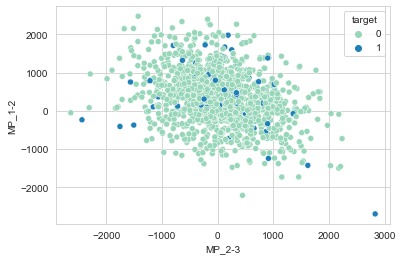

In [63]:
sns.scatterplot(x = df_final['MP_2-3'], y = df_final['MP_1-2'], hue = df_final['target'], palette = 'YlGnBu')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

<AxesSubplot:xlabel='PTS', ylabel='WS_3'>

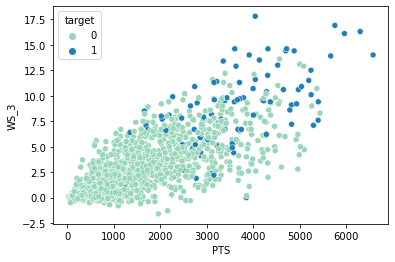

In [32]:
sns.scatterplot(x = df_final.PTS, y = df_final.WS_3, hue = df_final['target'], palette = 'YlGnBu')

In [178]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.scatter3D(x = df_final.VORP_3, y = df_final.PER_3, z = df_final.WS_3)
plt.show()

TypeError: 'Figure' object is not callable

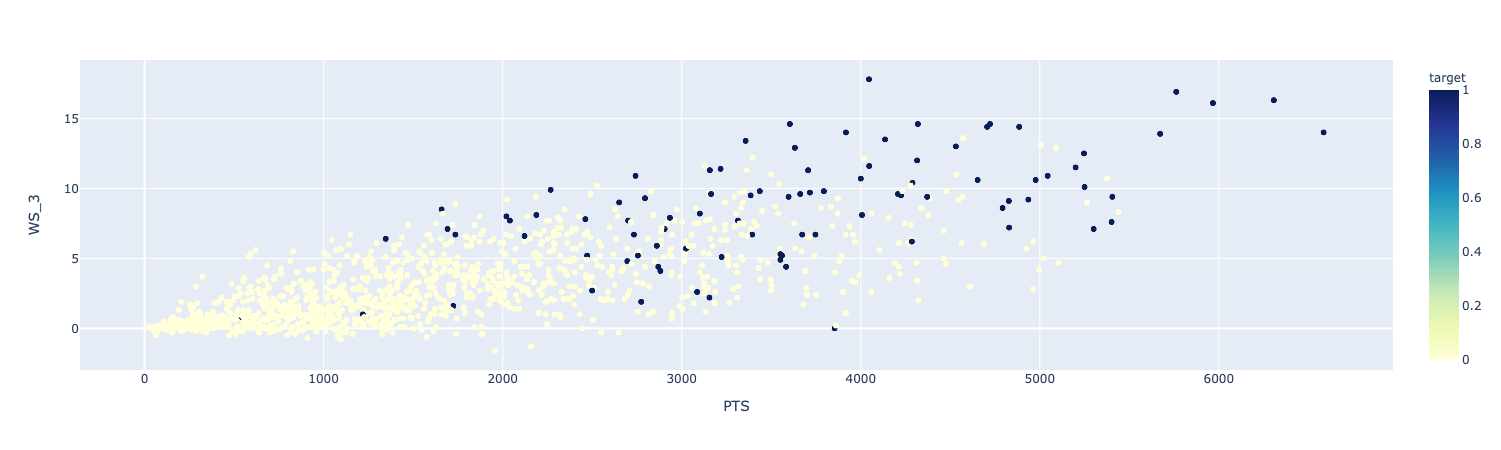

In [6]:
px.scatter(df_final, x = 'PTS', y ='WS_3', color = 'target', color_continuous_scale='YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='PER_3'>

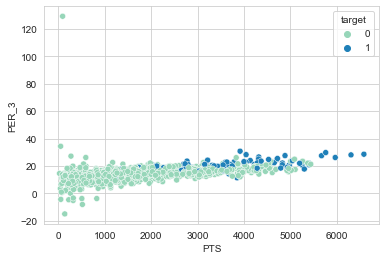

In [64]:
sns.scatterplot(x = df_final.PTS, y = df_final.PER_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS_3', ylabel='VORP_3'>

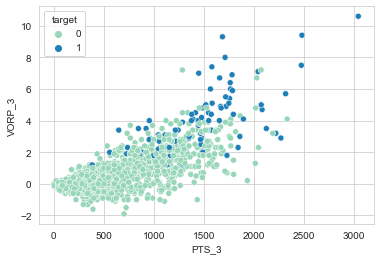

In [89]:
sns.scatterplot(x = df_final.PTS_3, y = df_final.VORP_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='G'>

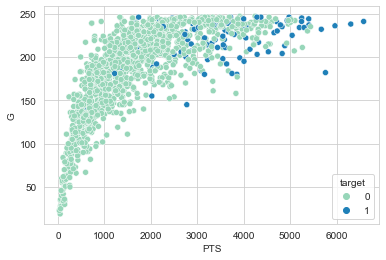

In [66]:
sns.scatterplot(x = df_final.PTS, y = df_final.G, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='GS'>

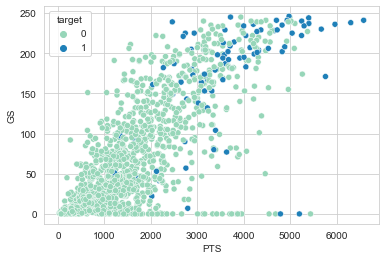

In [67]:
sns.scatterplot(x = df_final.PTS, y = df_final.GS, hue = df_final['target'], palette = 'YlGnBu')

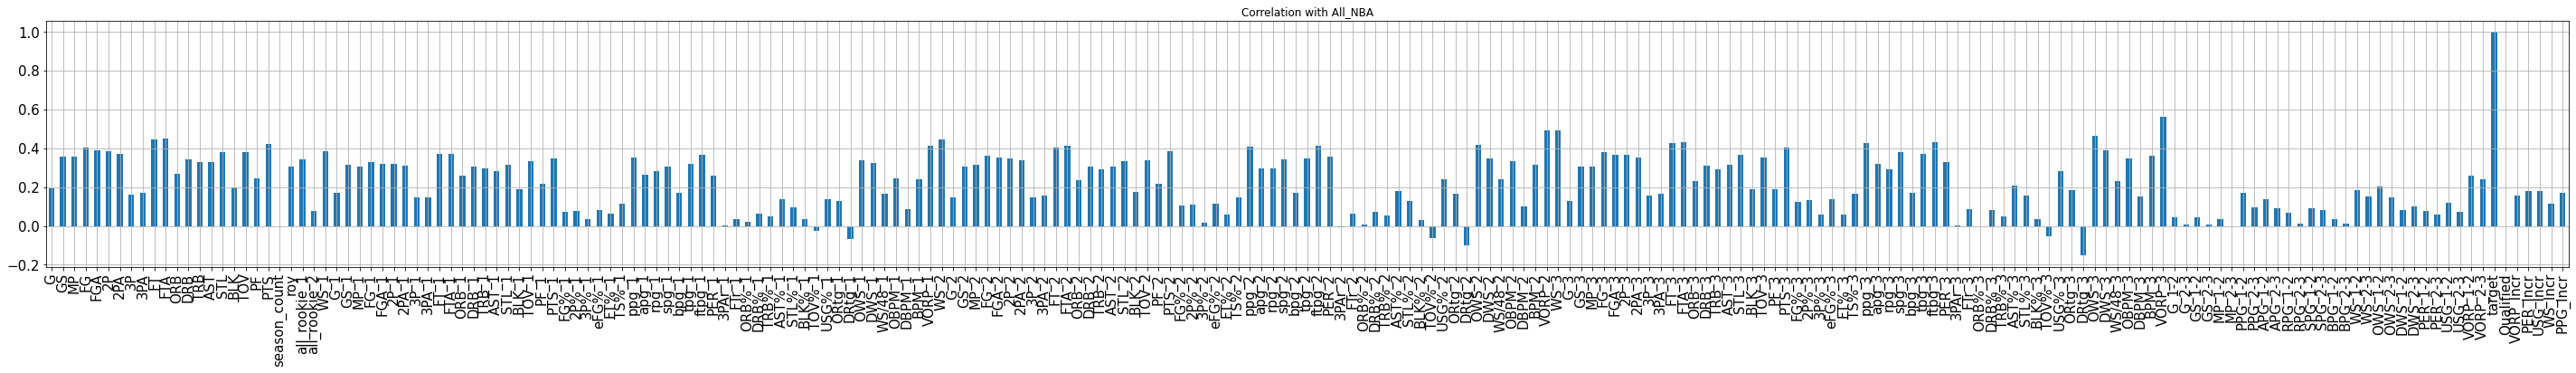

In [33]:
df_final.corrwith(df_final.target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

216

In [11]:
cols = ['GS','MP','FG','FGA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','WS_1','G_1','GS_1','MP_1','FG_1','FGA_1','2P_1',
        '2PA_1','3P_1','3PA_1','FT_1','FTA_1','ORB_1','DRB_1','TRB_1','AST_1','STL_1','BLK_1','TOV_1','PF_1','PTS_1','FG%_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','OWS_1','DWS_1','WS/48_1','OBPM_1','DBPM_1','BPM_1','VORP_1','WS_2','G_2','GS_2','MP_2','FG_2','FGA_2','2P_2','2PA_2','3P_2','3PA_2',
        'FT_2','FTA_2','ORB_2','DRB_2','TRB_2','AST_2','STL_2','BLK_2','TOV_2','PF_2','PTS_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','DRtg_2','OWS_2','DWS_2','WS/48_2','OBPM_2','DBPM_2','BPM_2','VORP_2','WS_3','G_3','GS_3','MP_3','FG_3','FGA_3','2P_3','2PA_3','3P_3','3PA_3','FT_3',
        'FTA_3','ORB_3','DRB_3','TRB_3','AST_3','STL_3','BLK_3','TOV_3','PF_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','DRtg_3','OWS_3','DWS_3','WS/48_3','OBPM_3','DBPM_3','BPM_3','VORP_3','target',]

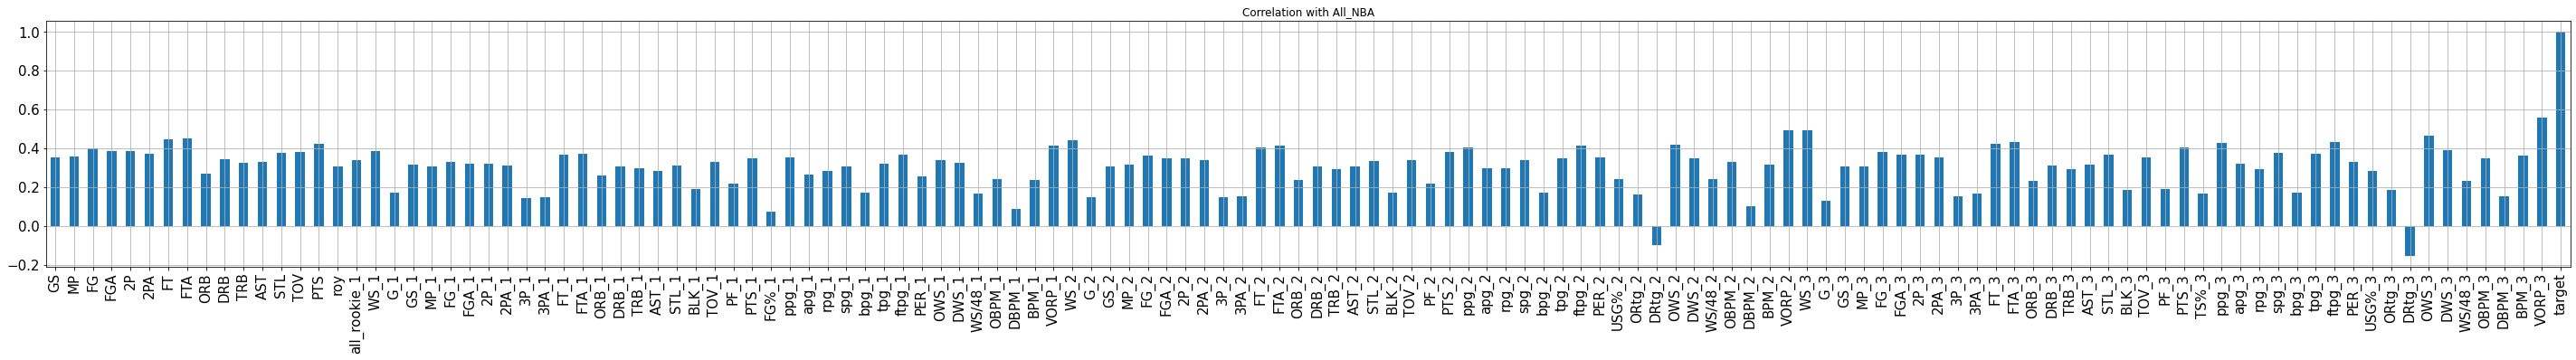

In [12]:
df_final[cols].corrwith(df_final[cols].target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

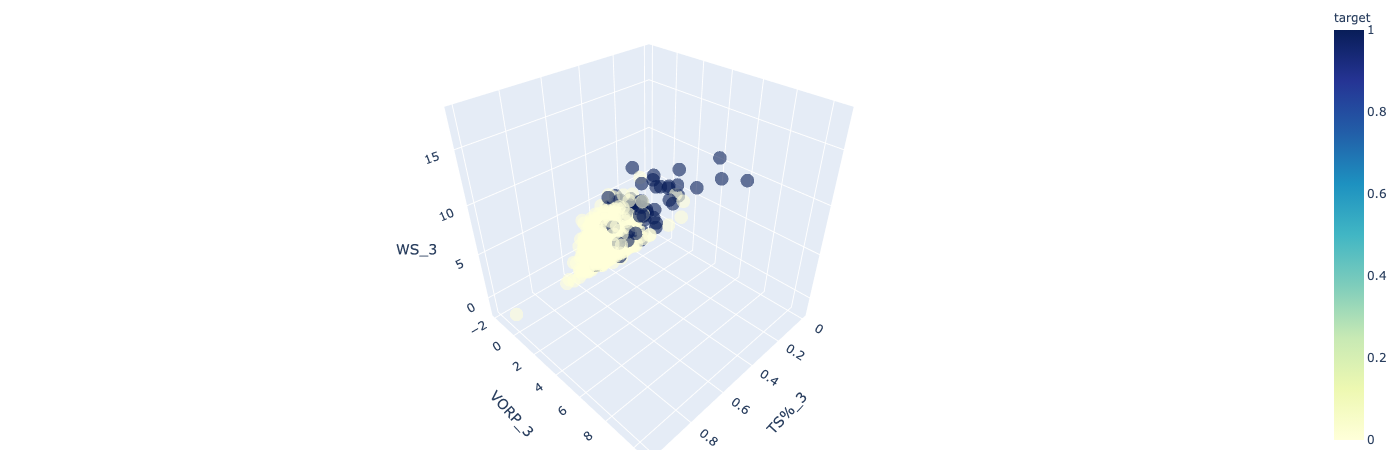

In [185]:
fig = px.scatter_3d(df_final, x='TS%_3', y='VORP_3', z='WS_3', color='target', size_max=10, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<AxesSubplot:xlabel='target', ylabel='PTS'>

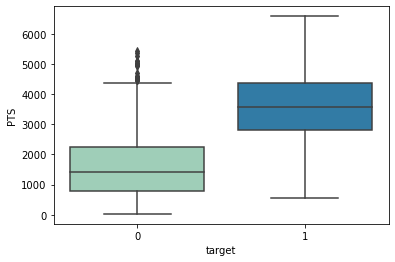

In [25]:
sns.boxplot(x = df_final['target'], y = df_final['PTS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='GS'>

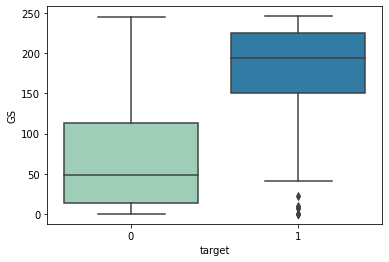

In [26]:
sns.boxplot(x = df_final['target'], y = df_final['GS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='G'>

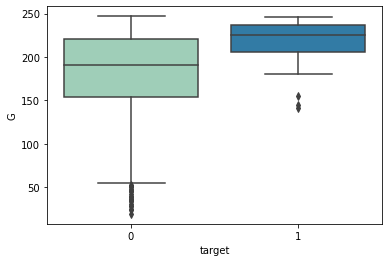

In [27]:
sns.boxplot(x = df_final['target'], y = df_final['G'], palette = 'YlGnBu')

In [68]:
full_df = pd.read_csv('Data/Final_NBA_PLayers.csv', index_col = 0)
full_df.head()

Rk                Player   Season   Age   Tm   Lg   WS   G    GS      MP  \
0  7584  A.C. Green\greenac01  1985-86  22.0  LAL  NBA  3.3  82   1.0  1542.0   
1  1935  A.C. Green\greenac01  1986-87  23.0  LAL  NBA  7.6  79  72.0  2240.0   
2  1736  A.C. Green\greenac01  1987-88  24.0  LAL  NBA  7.9  82  64.0  2636.0   
3  1027  A.C. Green\greenac01  1988-89  25.0  LAL  NBA  9.4  82  82.0  2510.0   
4  1854  A.C. Green\greenac01  1989-90  26.0  LAL  NBA  7.7  82  82.0  2709.0   

   ...  USG%   ORtg   DRtg  OWS  DWS  WS/48  OBPM  DBPM  BPM  VORP  
0  ...  14.7  108.0  105.0  1.4  2.0  0.103  -1.6   0.1 -1.6   0.2  
1  ...  14.7  122.0  105.0  4.3  3.3  0.163   0.9   0.1  1.0   1.7  
2  ...  14.7  119.0  106.0  4.5  3.4  0.144   0.4  -0.1  0.3   1.5  
3  ...  17.0  122.0  105.0  5.8  3.5  0.179   1.8  -0.2  1.6   2.3  
4  ...  17.1  116.0  107.0  4.4  3.3  0.137   0.3  -0.9 -0.6   1.0  

[5 rows x 77 columns]

In [70]:
list(full_df.columns)

['Rk',
 'Player',
 'Season',
 'Age',
 'Tm',
 'Lg',
 'WS',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 '2P',
 '2PA',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'FG%',
 '2P%',
 '3P%',
 'eFG%',
 'FT%',
 'TS%',
 'season_count',
 'ppg',
 'apg',
 'rpg',
 'spg',
 'bpg',
 'tpg',
 'ftpg',
 'name_split',
 'name',
 'unique_id',
 'year_split',
 'award_year',
 'season_year',
 'concat',
 'unique_id_match',
 'all_nba_first',
 'all_nba_second',
 'all_nba_third',
 'all_rookie_1',
 'all_rookie_2',
 'all_d_1',
 'all_d_2',
 'roy',
 'PER',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'ORtg',
 'DRtg',
 'OWS',
 'DWS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [78]:
full_df.fillna(0, inplace = True)

In [81]:
full_df['all_nba_first'].value_counts()

0.0    22502
1.0      371
Name: all_nba_first, dtype: int64

<AxesSubplot:xlabel='season_count', ylabel='season_count'>

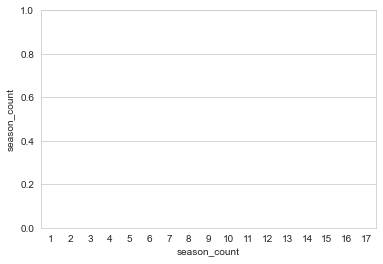

In [88]:
all_nba = full_df[full_df['all_nba_first'] == 1]

sns.boxplot(x = all_nba.season_count, y = all_nba.season_count.value_counts())

In [101]:
rfe_cols = ['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3', 'target']

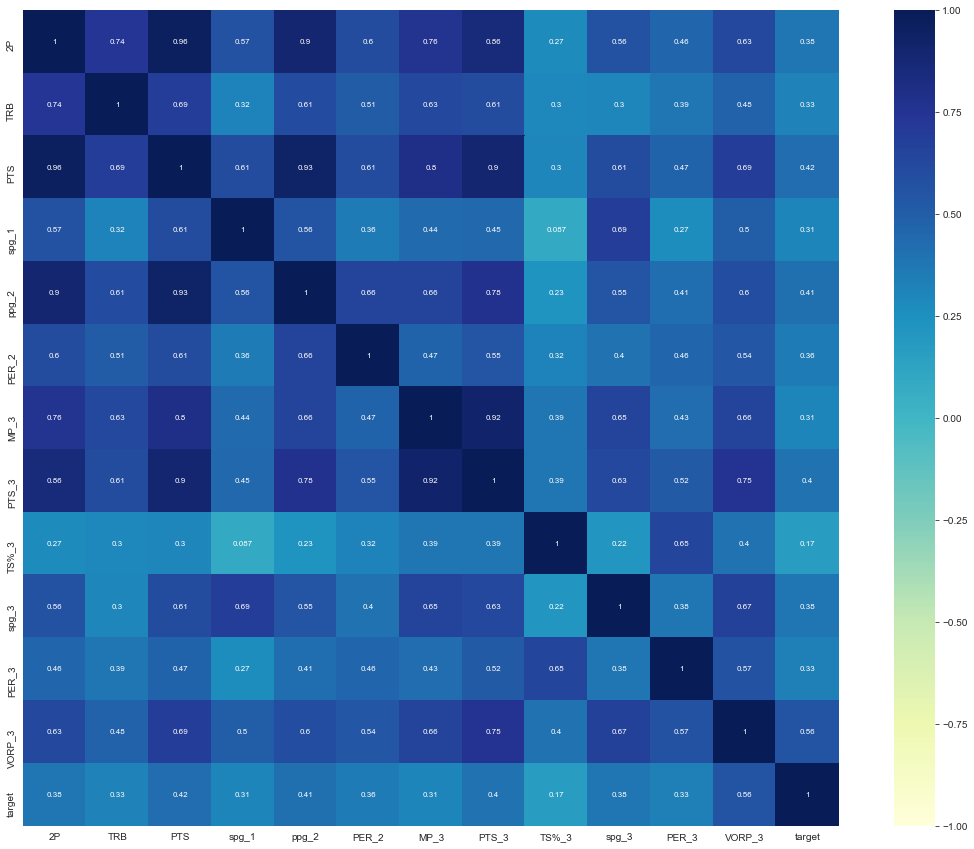

In [106]:
# df_final[rfe_cols].corr()

nba_corr = df_final[rfe_cols].corr()
plt.subplots(figsize=(20,15))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

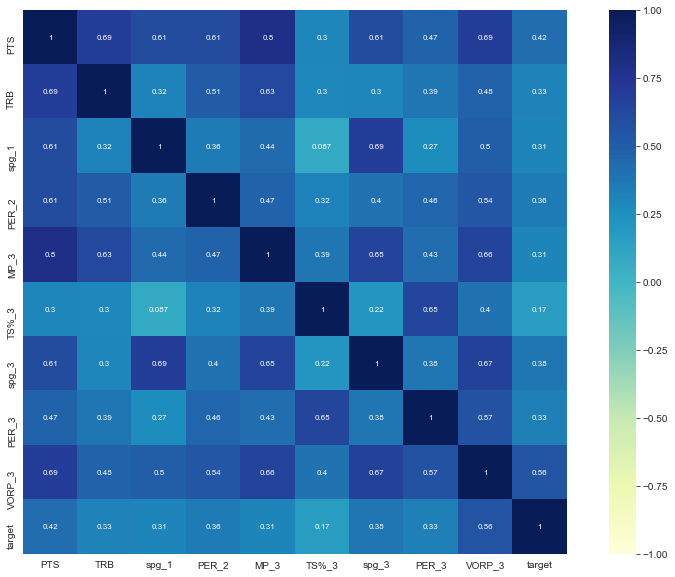

In [119]:
#dropping 'PTS' as it is correlated w/ multiple features
rfe_cols = ['PTS', 'TRB', 'spg_1', 'PER_2', 'MP_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3', 'target']

nba_corr = df_final[rfe_cols].corr()
plt.subplots(figsize=(15,10))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

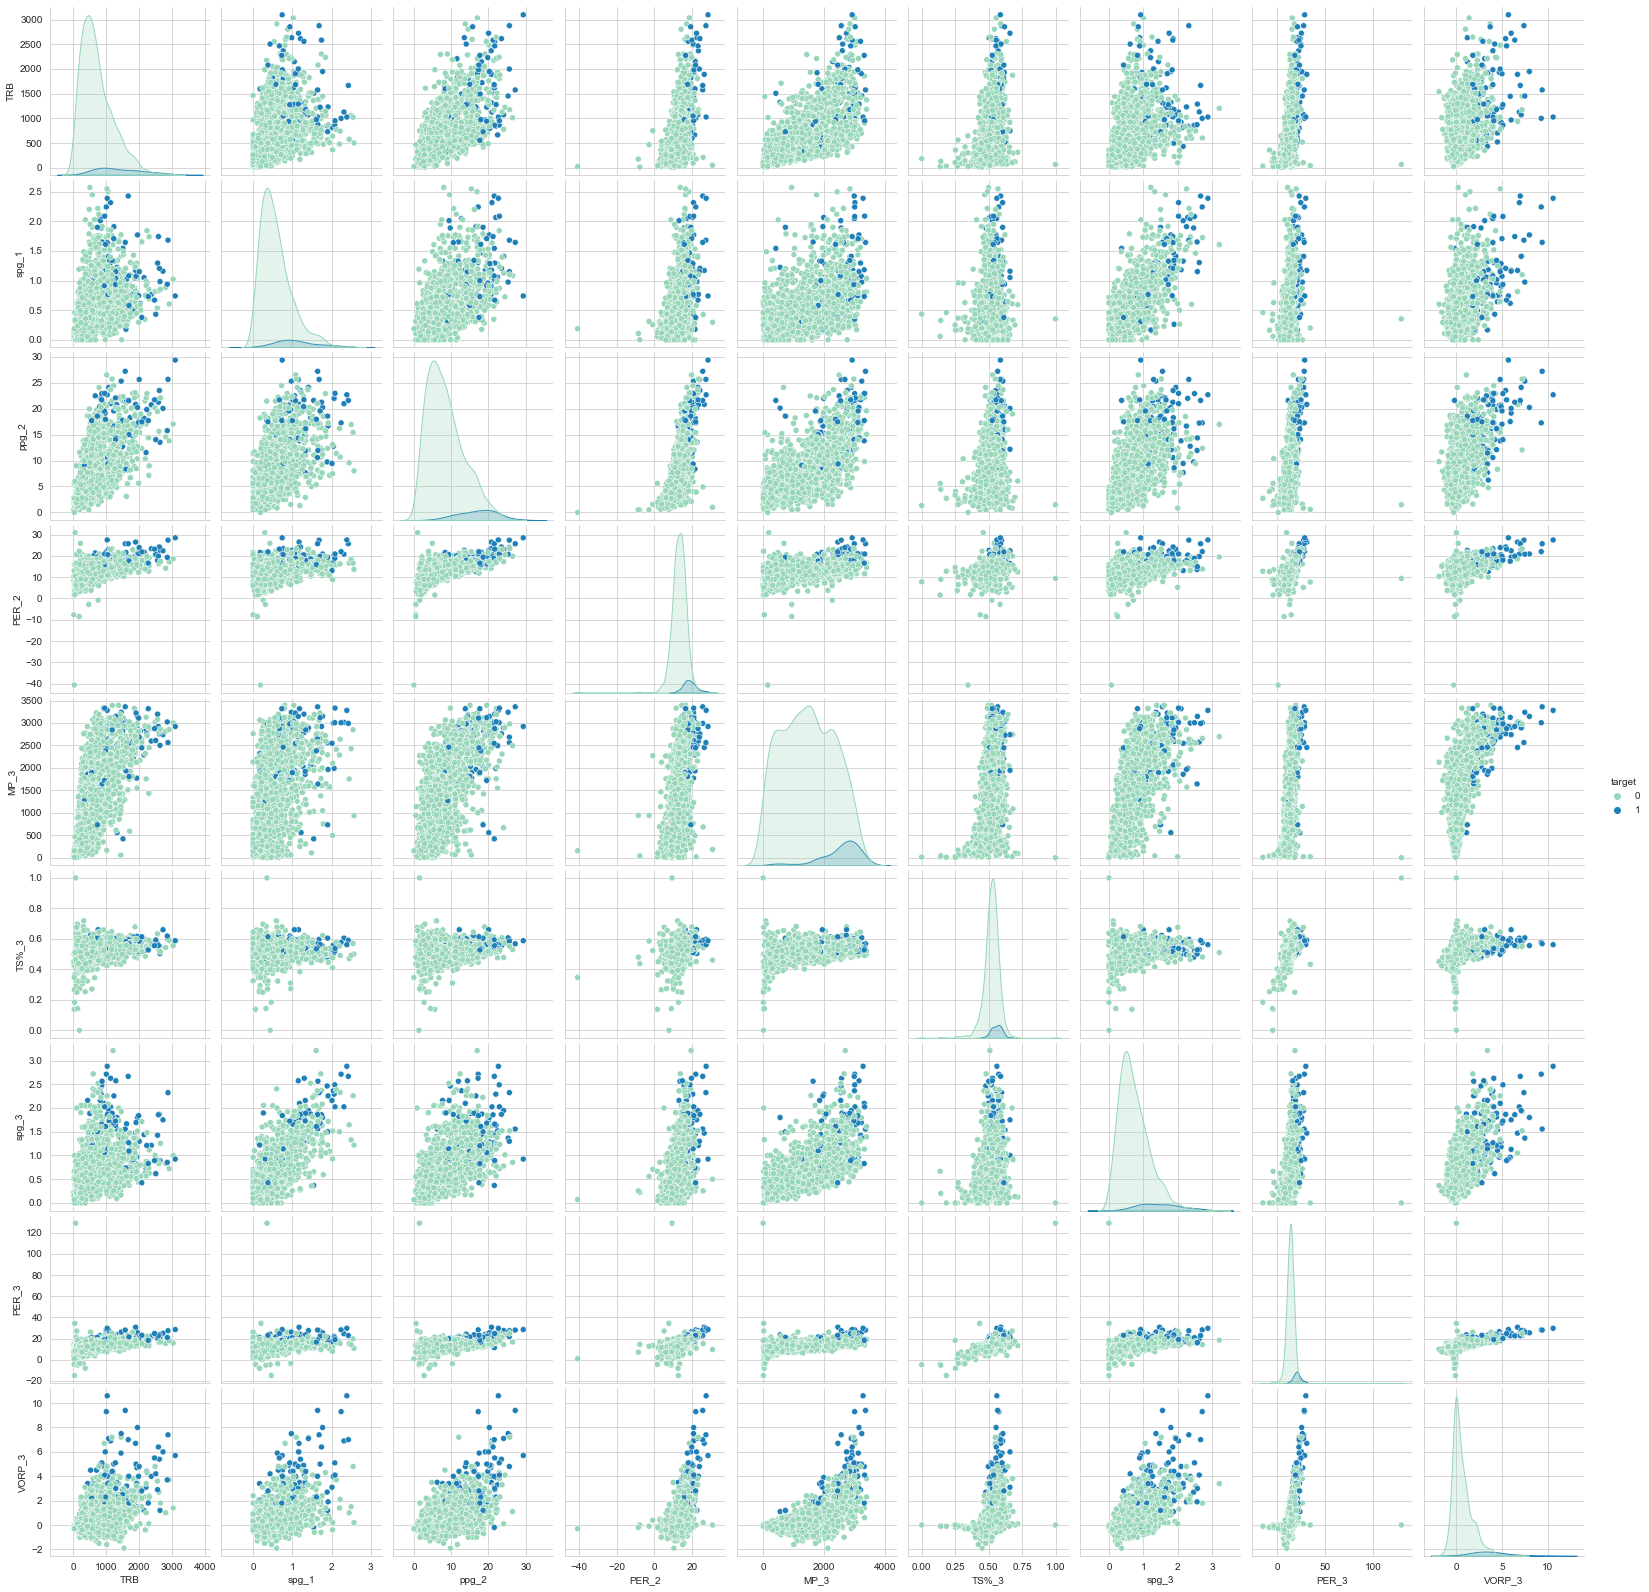

In [112]:
# stats = ['HOF', 'BLK', 'STL', 'PPG', 'APG', 'RPG', 'USG%', 'OWS', 'DWS', 'WS', 'TS%', 'PER', 'eFG%', 'champ', 'runner_up', 'all_star_app']

pair_plt_stats = df_final[rfe_cols]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

plt.savefig('nba_pair_plt.png')
plt.show();

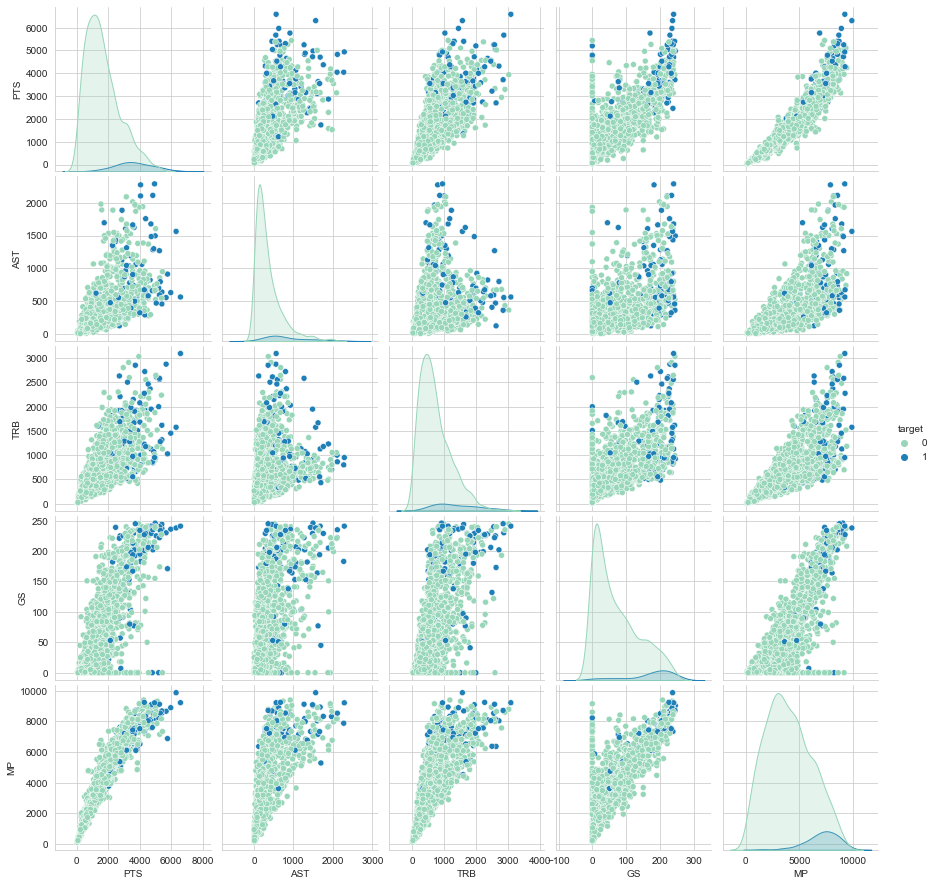

In [113]:
pair_plt_stats = df_final[['PTS','AST','TRB','GS', 'MP','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

plt.savefig('nba_pair_plt_basic.png')
plt.show();

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

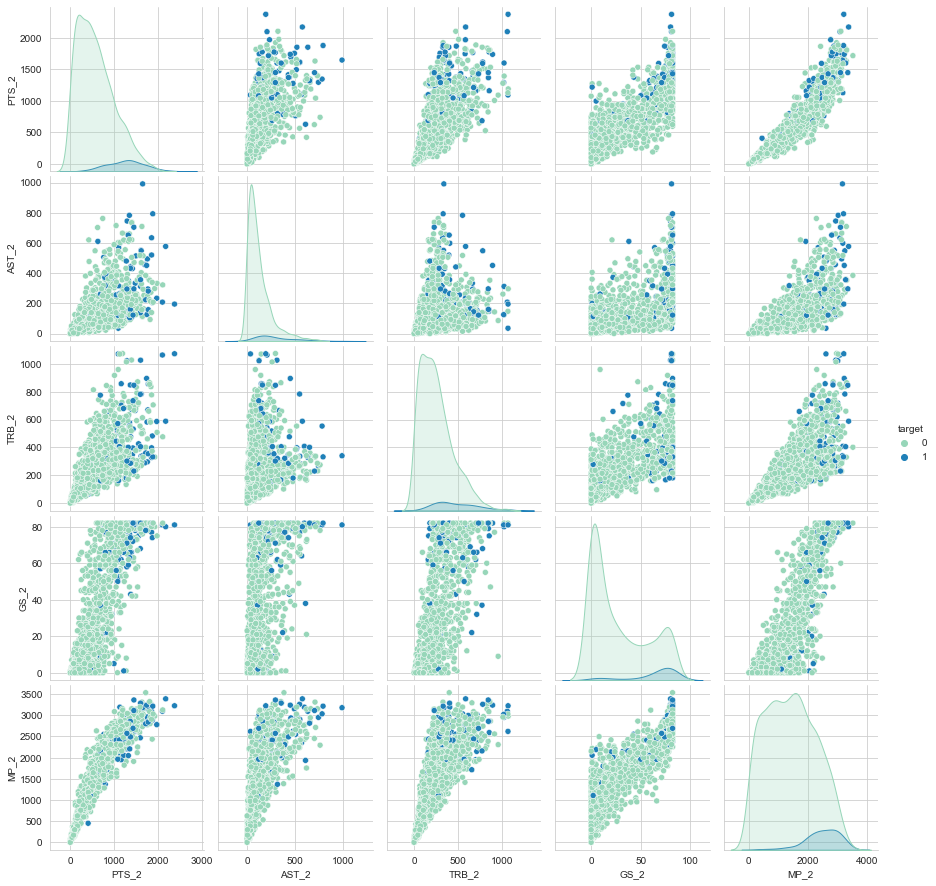

In [165]:
pair_plt_stats = df_final[['PTS_2','AST_2','TRB_2','GS_2', 'MP_2','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

plt.savefig('nba_pair_plt_basic_3.png')
plt.show();

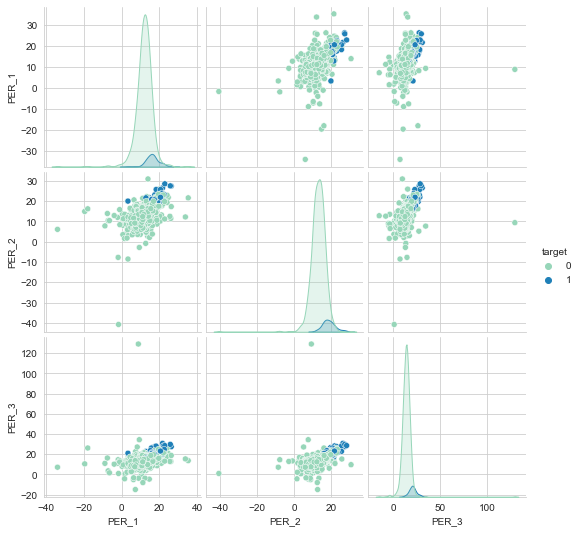

In [134]:
pair_plt_stats = df_final[['PER_1','PER_2','PER_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

# plt.savefig('nba_pair_plt_adv.png')
# plt.show();

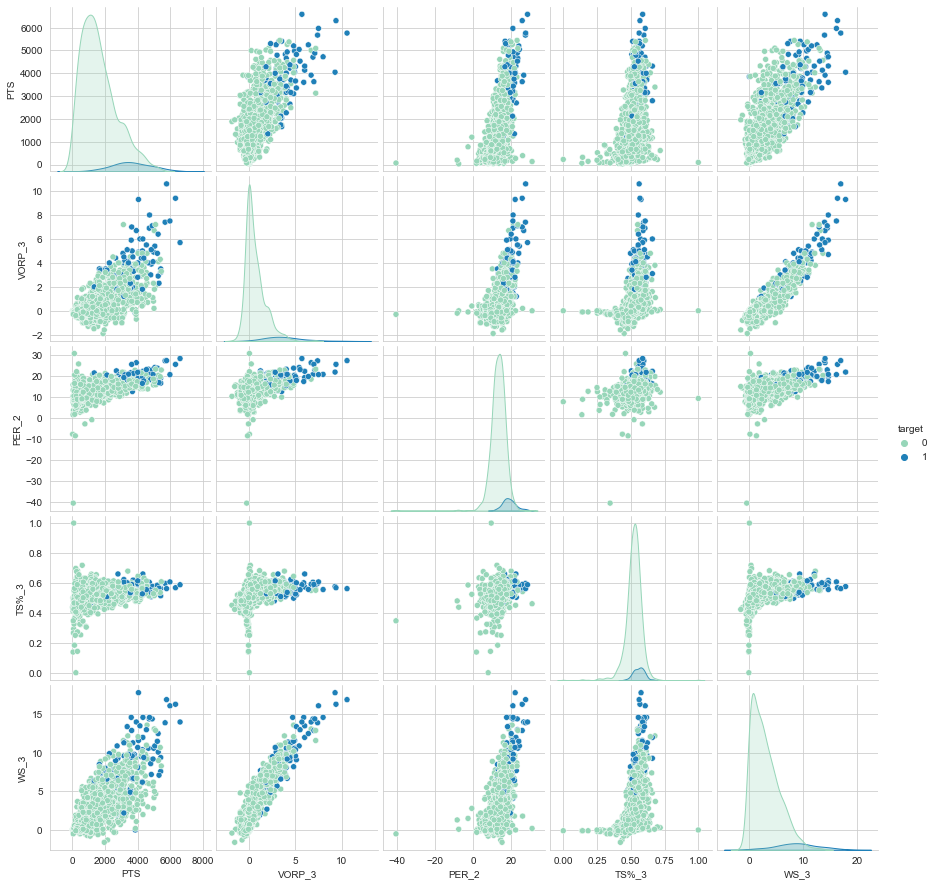

In [167]:
pair_plt_stats = df_final[['PTS','VORP_3','PER_2','TS%_3','WS_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

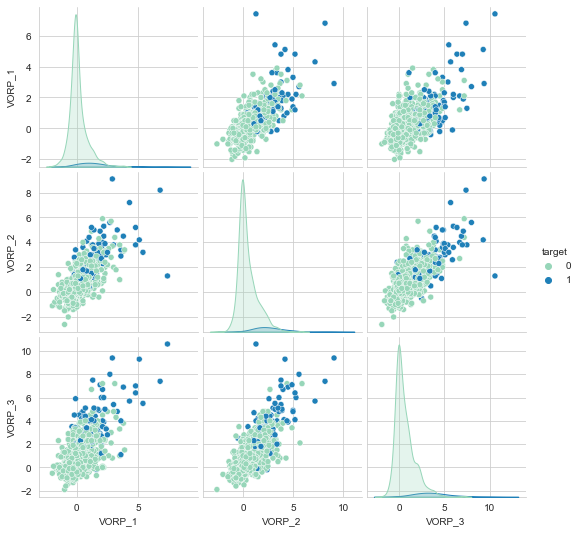

In [136]:
pair_plt_stats = df_final[['VORP_1','VORP_2','VORP_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')